# simple linear regression analysis

- HW3.csv 파일에는 은행고객의 수입(Income), 신용한도(Limit), 신용점수(Rating), 신용카
드 개수(Cards), 나이(Age), 교육년수(Education), 성별(Gender), 학생 여부(Student), 결혼여부(Married), 인종(Ethnicity), 그리고 잔고(Balance)가 저장되어 있다. Balance를 레이블로 하는 아래 회귀분석을 실시하시오

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1) 파일을 읽어 데이터프레임을 생성하고 처음 3개의 샘플을 출력하시오. 특성의 개수와 샘플(관측치)의 개수를 구하고 결측치가 있는지 알아보시오. 수치형 특성과 범주형 특성은 무엇인지 파악하시오. 

In [3]:
df = pd.read_csv('HW3.csv', index_col=[0])
df.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [9]:
# 특성의 개수, 샘플의 개수
df.shape

(400, 11)

In [13]:
# 결측치 확인
df.isnull().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [23]:
# 수치, 범주형 특성 확인
df.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

## 2)수치형 특성과 레이블에 대하여는 히스토그램을 작성하고 범주형 특성에 대하여는 막대그래프를 작성하고 간단히 코멘트 하시오.

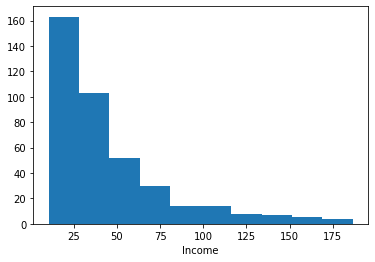

In [162]:
# Income - 수치형
plt.hist(df['Income'])
plt.xlabel('Income');

In [163]:
print(df['Income'].dtypes)
print(df['Income'].isnull().sum())
print(df['Income'].describe())

float64
0
count    400.000000
mean      45.218885
std       35.244273
min       10.354000
25%       21.007250
50%       33.115500
75%       57.470750
max      186.634000
Name: Income, dtype: float64


- income은 은행고객들의 수입을 나타낸 수치형 특성이다. 
- 특성의 모양은 (400,)이다.
- 특성은 float64 타입이며, null값을 가지지 않는다.
- 특성의 평균은 45.2이며, 표준편차는 35.2이다.
- 특성의 최대값은 186.6, 최소값은 10.4이다. 

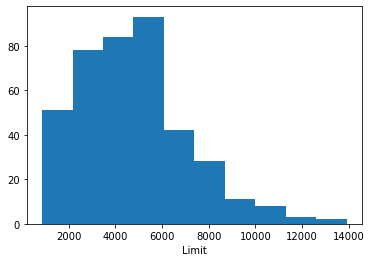

In [76]:
# Limit - 수치형
plt.hist(df['Limit'])
plt.xlabel('Limit');

In [77]:
print(df['Limit'].dtypes)
print(df['Limit'].isnull().sum())
print(df['Limit'].describe())

int64
0
count      400.000000
mean      4735.600000
std       2308.198848
min        855.000000
25%       3088.000000
50%       4622.500000
75%       5872.750000
max      13913.000000
Name: Limit, dtype: float64


- Limit은 은행고객들의 신용한도을 나타낸 수치형 특성이다. 
- 특성의 모양은 (400,)이다.
- 특성은 float64 타입이며, null값을 가지지 않는다.
- 특성의 평균은 4735.6이며, 표준편차는 2308.2이다.
- 특성의 최대값은 13913, 최소값은 855이다. 

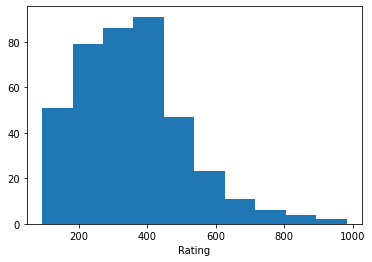

In [78]:
# Rating - 수치형
plt.hist(df['Rating'])
plt.xlabel('Rating');

In [79]:
print(df['Rating'].dtypes)
print(df['Rating'].isnull().sum())
print(df['Rating'].describe())

int64
0
count    400.000000
mean     354.940000
std      154.724143
min       93.000000
25%      247.250000
50%      344.000000
75%      437.250000
max      982.000000
Name: Rating, dtype: float64


- Rating은 은행고객들의 신용점수을 나타낸 수치형 특성이다. 
- 특성의 모양은 (400,)이다.
- 특성은 float64 타입이며, null값을 가지지 않는다.
- 특성의 평균은 354.9이며, 표준편차는 154.7이다.
- 특성의 최대값은 982, 최소값은 93이다. 

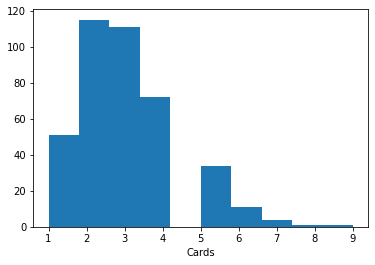

In [80]:
# Cards - 수치형
plt.hist(df['Cards'])
plt.xlabel('Cards');

In [81]:
print(df['Cards'].dtypes)
print(df['Cards'].isnull().sum())
print(df['Cards'].describe())

int64
0
count    400.000000
mean       2.957500
std        1.371275
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: Cards, dtype: float64


- Cards은 은행고객들의 카드 개수을 나타낸 수치형 특성이다. 
- 특성의 모양은 (400,)이다.
- 특성은 float64 타입이며, null값을 가지지 않는다.
- 특성의 평균은 2.96이며, 표준편차는 1.4이다.
- 특성의 최대값은 9, 최소값은 1이다. 

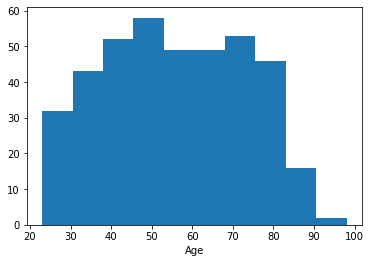

In [82]:
# Age - 수치형
plt.hist(df['Age'])
plt.xlabel('Age');

In [83]:
print(df['Age'].dtypes)
print(df['Age'].isnull().sum())
print(df['Age'].describe())

int64
0
count    400.000000
mean      55.667500
std       17.249807
min       23.000000
25%       41.750000
50%       56.000000
75%       70.000000
max       98.000000
Name: Age, dtype: float64


- Age는 은행고객들의 나이을 나타낸 수치형 특성이다. 
- 특성의 모양은 (400,)이다.
- 특성은 float64 타입이며, null값을 가지지 않는다.
- 특성의 평균은 55.7이며, 표준편차는 17이다.
- 특성의 최대값은 98, 최소값은 23이다. 

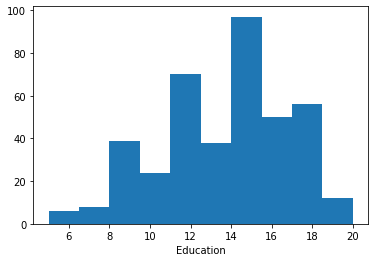

In [84]:
# Education - 수치형
plt.hist(df['Education'])
plt.xlabel('Education');

In [85]:
print(df['Education'].dtypes)
print(df['Education'].isnull().sum())
print(df['Education'].describe())

int64
0
count    400.000000
mean      13.450000
std        3.125207
min        5.000000
25%       11.000000
50%       14.000000
75%       16.000000
max       20.000000
Name: Education, dtype: float64


- Education은 은행고객들의 교육년수를 나타낸 수치형 특성이다. 
- 특성의 모양은 (400,)이다.
- 특성은 float64 타입이며, null값을 가지지 않는다.
- 특성의 평균은 13.5이며, 표준편차는 3.1이다.
- 특성의 최대값은 20, 최소값은 5이다. 

In [147]:
# 명목형 자료 변환
def convert(data):
    a = data.value_counts().index[0]
    a_sum = data.value_counts().values[0]
    b = data.value_counts().index[1]
    b_sum = data.value_counts().values[1]
    result1 = [a, b]
    result2 = [a_sum, b_sum]
    
    return result1, result2

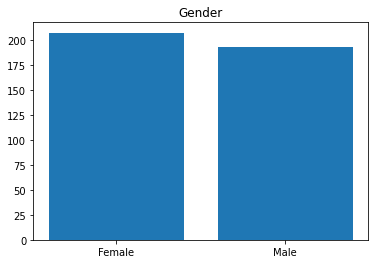

In [148]:
# Gender - 명목형
a, b = convert(df['Gender'])
plt.bar(a, b)
plt.title('Gender');

In [154]:
print(df['Gender'].dtypes)
print(df['Gender'].isnull().sum())
print(df['Gender'].shape)
print(round(b[0]/b[1] * 100, 2))

object
0
(400,)
107.25


- Gender는 성별을 나타낸 (400,)형태의 명목형 특성이다.
- 특성은 문자열 타입이며, null값을 가지지 않는다. 
- 남성 대비 여성비(ratio)는 107.25이다.

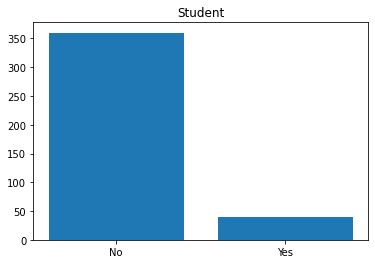

In [156]:
# Student - 명목형
a, b = convert(df['Student'])
plt.bar(a, b)
plt.title('Student');

In [157]:
print(df['Student'].dtypes)
print(df['Student'].isnull().sum())
print(df['Student'].shape)
print(round(b[0]/b[1] * 100, 2))

object
0
(400,)
900.0


- Student는 학생 여부를 나타낸 (400,)형태의 명목형 특성이다.
- 특성은 문자열 타입이며, null값을 가지지 않는다. 
- 학생이 아닌 사람은 학생인 사람보다 9배가 많다.

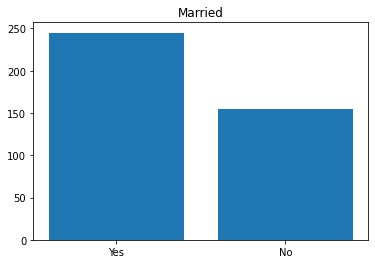

In [158]:
# Married - 명목형
a, b = convert(df['Married'])
plt.bar(a, b)
plt.title('Married');

In [159]:
print(df['Married'].dtypes)
print(df['Married'].isnull().sum())
print(df['Married'].shape)
print(round(b[0]/b[1] * 100, 2))

object
0
(400,)
158.06


- Married는 결혼 여부를 나타낸 (400,)형태의 명목형 특성이다.
- 특성은 문자열 타입이며, null값을 가지지 않는다. 
- 미혼 대비 기혼비(ratio)는 158.06이다.

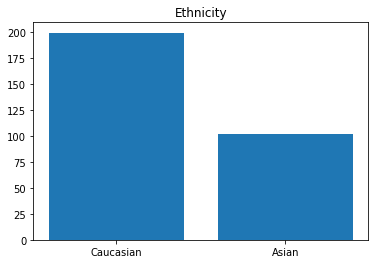

In [160]:
# Ethnicity - 명목형
a, b = convert(df['Ethnicity'])
plt.bar(a, b)
plt.title('Ethnicity');

In [161]:
print(df['Ethnicity'].dtypes)
print(df['Ethnicity'].isnull().sum())
print(df['Ethnicity'].shape)
print(round(b[0]/b[1] * 100, 2))

object
0
(400,)
195.1


- Ethnicity는 인종을 나타낸 (400,)형태의 명목형 특성이다.
- 특성은 문자열 타입이며, null값을 가지지 않는다. 
- 아시안 대비 코카서스인(ratio)은 195.1이다.

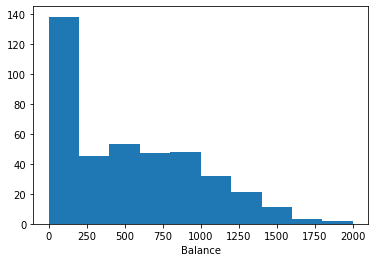

In [139]:
# Balance - 수치형
plt.hist(df['Balance'])
plt.xlabel('Balance');

In [87]:
print(df['Balance'].dtypes)
print(df['Balance'].isnull().sum())
print(df['Balance'].describe())

int64
0
count     400.000000
mean      520.015000
std       459.758877
min         0.000000
25%        68.750000
50%       459.500000
75%       863.000000
max      1999.000000
Name: Balance, dtype: float64


- Balance는 은행고객들의 잔고을 나타낸 수치형 특성이다. 
- 특성의 모양은 (400,)이다.
- 특성은 float64 타입이며, null값을 가지지 않는다.
- 특성의 평균은 520이며, 표준편차는 460이다.
- 특성의 최대값은 1999, 최소값은 0이다. 

### 3) 데이터프레임에 corr() 메서드를 적용하여 변수들간의 상관계수를 출력하고 해석하시오. 

In [164]:
df.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


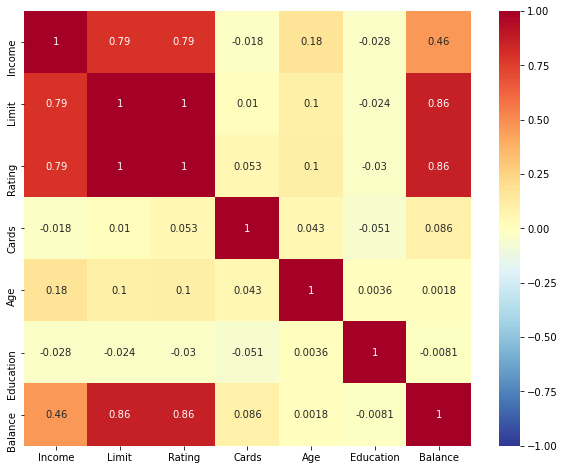

In [6]:
import seaborn as sns
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), 
            annot = True, # 값 표시
            cmap = 'RdYlBu_r', # 색 바꾸기
            vmin = -1, vmax = 1); # 컬러차트 범위

- 매우 강한 양의 상관관계(+0.7 ~ +1.0)를 갖는 변수
    1. Limit & Income
    2. Rating & Income
    3. Balance & Limit
    4. Balance & Rating
- 뚜렷한 양적 상관관계(+0.3 ~ +0.7)를 갖는 변수
    1. Balance & Income

## 4) 각 수치형 특성과 Balance(잔고) 변수와의 산점도를 아래와 같은 subplot으로 작성하시오

In [39]:
y = df['Balance']
y

1      333
2      903
3      580
4      964
5      331
      ... 
396    560
397    480
398    138
399      0
400    966
Name: Balance, Length: 400, dtype: int64

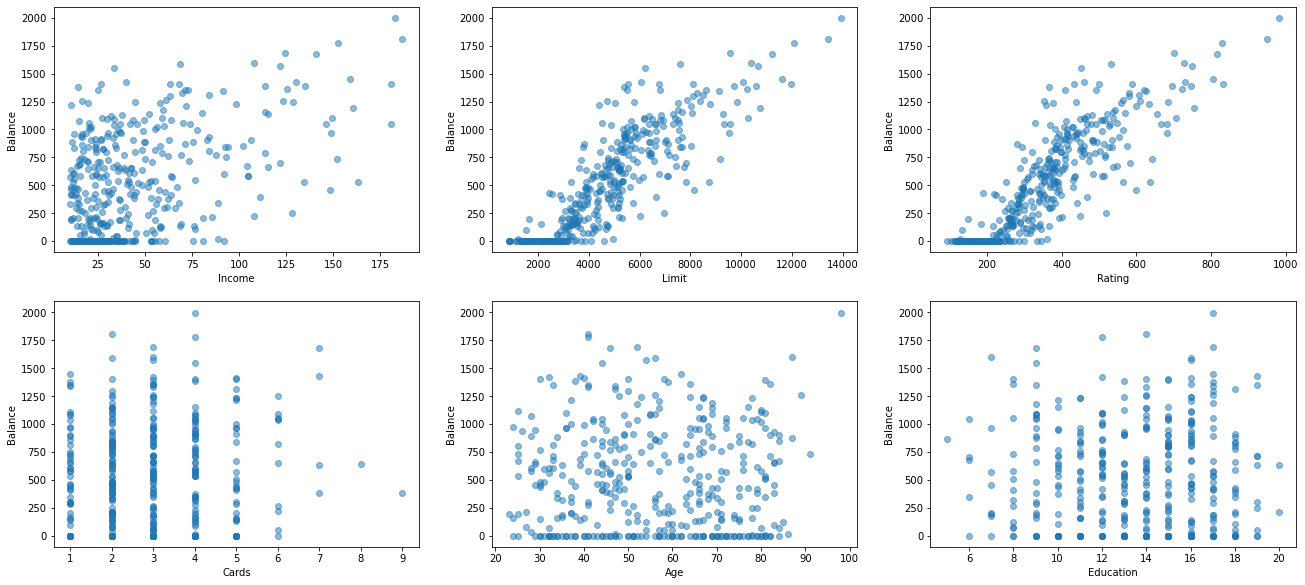

In [58]:
plt.subplot(2, 3, 1)
plt.scatter(df.iloc[:,0], y, alpha = 0.5)
plt.xlabel(df.columns[0])
plt.ylabel('Balance')

plt.subplot(2, 3, 2)
plt.scatter(df.iloc[:,1], y, alpha = 0.5)
plt.xlabel(df.columns[1])
plt.ylabel('Balance')

plt.subplot(2, 3, 3)
plt.scatter(df.iloc[:,2], y, alpha = 0.5)
plt.xlabel(df.columns[2])
plt.ylabel('Balance')

plt.subplot(2, 3, 4)
plt.scatter(df.iloc[:,3], y, alpha = 0.5)
plt.xlabel(df.columns[3])
plt.ylabel('Balance')

plt.subplot(2, 3, 5)
plt.scatter(df.iloc[:,4], y, alpha = 0.5)
plt.xlabel(df.columns[4])
plt.ylabel('Balance')

plt.subplot(2, 3, 6)
plt.scatter(df.iloc[:,5], y, alpha = 0.5)
plt.xlabel(df.columns[5])
plt.ylabel('Balance')

plt.subplots_adjust(right = 3,top = 2, wspace=0.2, hspace = 0.2)

## 5)Rating(신용점수) 변수를 특성으로 하고 Balance(잔고) 변수를 레이블로 하는 단순선형회귀모형을 훈련하고 산점도에 회귀직선식을 표시하고 이 모형의 결정계수(R<SUP>2</SUP>)를 구하시오.

In [65]:
X = df['Rating'].to_numpy().reshape(len(X), 1)
X.shape

(400, 1)

In [68]:
y = df['Balance'].to_numpy()
y.shape

(400,)

In [98]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)
# 계수, 절편
reg.coef_, reg.intercept_

(array([2.56624033]), -390.84634178723786)

In [99]:
# R^2
reg.score(X, y)

0.7458484180585037

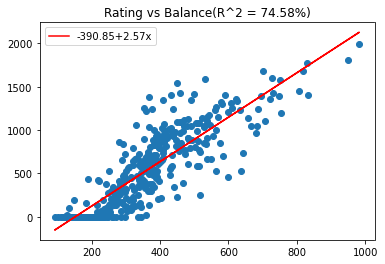

In [100]:
label = str(round(reg.intercept_, 2)) + '+' + str(round(reg.coef_[0], 2)) + 'x'
plt.scatter(X, y);

pred = reg.predict(X)
plt.plot(X, pred, color = 'red', label = label)
plt.legend()
plt.title('Rating vs Balance(R^2 = 74.58%)');

## 6)수치형 특성들만 포함하여 데이터를 훈련용과 테스트용으로 7:3으로 분할(random_state=0)하여 선형회귀모형을 훈련시키고 훈련데이터와 테스트데이터에 대한 결정계수를 구하시오. 과대적합이나 과소적합이 의심되는지 코멘트 하시오. Income이 100, Limit가 6000, Rating이 550, Card가 5개, 나이가 55, 교육년수가 20인 사람의 잔고를 예측하시오.

In [118]:
df.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [191]:
# X, y
data = df.copy().drop(['Gender', 'Student', 'Married','Ethnicity'], axis = 1)

y = data.Balance.to_numpy()
X = data.drop('Balance', axis = 1).to_numpy()

In [192]:
# 분할
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                   train_size = 0.7,  # test size는 자동 할당됨
                                                   random_state = 0) 

# stratify = y --> y의 분포대로 샘플링(계층화)(분류에서만 가능) --> 0이 30, 1이 70 있다면, 이 비율을 유지 ?

In [193]:
from sklearn.linear_model import LinearRegression

# 인스턴스화
reg = LinearRegression()
# train 데이터로 훈련
reg.fit(X_train, y_train)

LinearRegression()

In [194]:
# 결정계수(train, test)
reg.score(X_train, y_train), reg.score(X_test, y_test)

(0.8857073035585357, 0.8557914117915563)

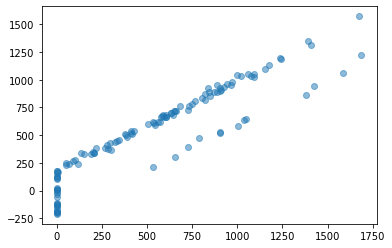

In [195]:
# 비교
# 테스트 데이터 예측 값
pred = reg.predict(X_test)
pred
# 스케터 플롯
plt.scatter(y_test, pred, alpha = 0.5) # x축은 실제 잔고, y축은 예측 잔고

- 모형의 훈련 데이터에 대한 결정계수(R<SUP>2</SUP>)는 0.886, 테스트 데이터에 대한 결정계수(R<SUP>2</SUP>)는 0.856임을 확인할 수 있다.
- 훈련 데이터, 테스트 데이터 간 결정계수 차이가 크게 나지 않고, 그 값이 1에 가까우므로(0.886, 0.856) 과대적합이나 과소적합이 의심되지 않는다.

In [196]:
# 사람 예측
man = [[100, 6000, 550, 5, 55, 20]]
reg.predict(man)

array([641.83257176])